In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

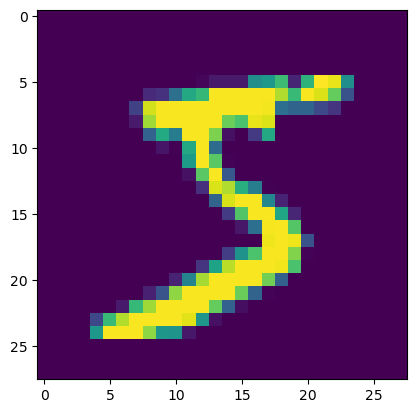

In [5]:
np.set_printoptions(threshold=np.inf, linewidth=280)
print(x_train[0])
plt.imshow(x_train[0])

In [7]:
print(x_train.shape)

x_train=x_train.reshape(60000, 28, 28, 1)
x_train=x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test=x_test/255.0

print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1448 - accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0489 - accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0141 - accuracy: 0.9956
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0108 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0053 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0047 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 35s 19m

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

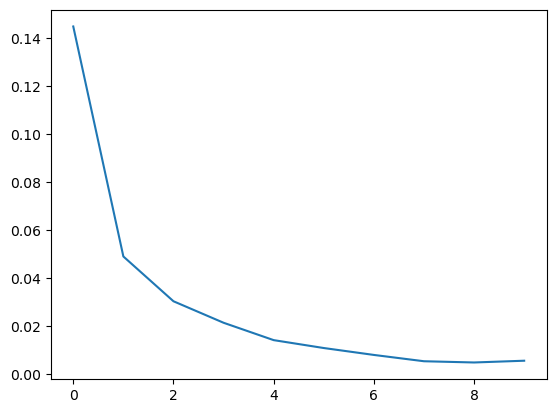

In [15]:
plt.plot(history.history['loss'])
model.summary()

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0593 - accuracy: 0.9871


[0.05932805687189102, 0.9871000051498413]